In [11]:
import kagglehub
tongpython_cat_and_dog_path = kagglehub.dataset_download('tongpython/cat-and-dog')

print('Data source import complete.')

Data source import complete.


In [20]:
print(tongpython_cat_and_dog_path)

/kaggle/input/cat-and-dog


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
plt.style.use('ggplot')

In [24]:
import os

base_path = tongpython_cat_and_dog_path
cat_files = glob(os.path.join(base_path, 'training_set/training_set/cats/*.jpg'))
dog_files = glob(os.path.join(base_path, 'training_set/training_set/dogs/*.jpg'))

print("Cats:", len(cat_files))
print("Dogs:", len(dog_files))

Cats: 4000
Dogs: 4005


Reading images

In [25]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((232, 350, 3), (232, 350, 3))

image arraqy

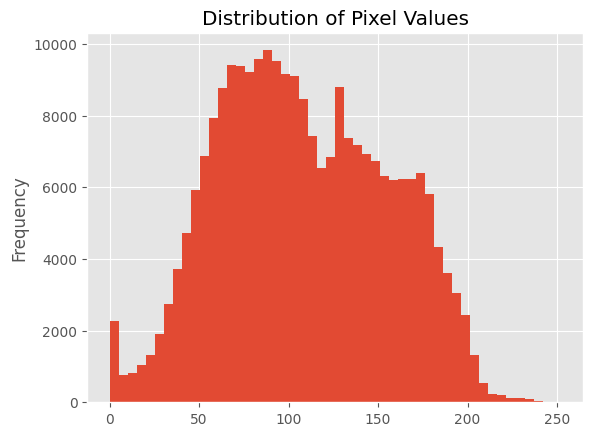

In [26]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

display images

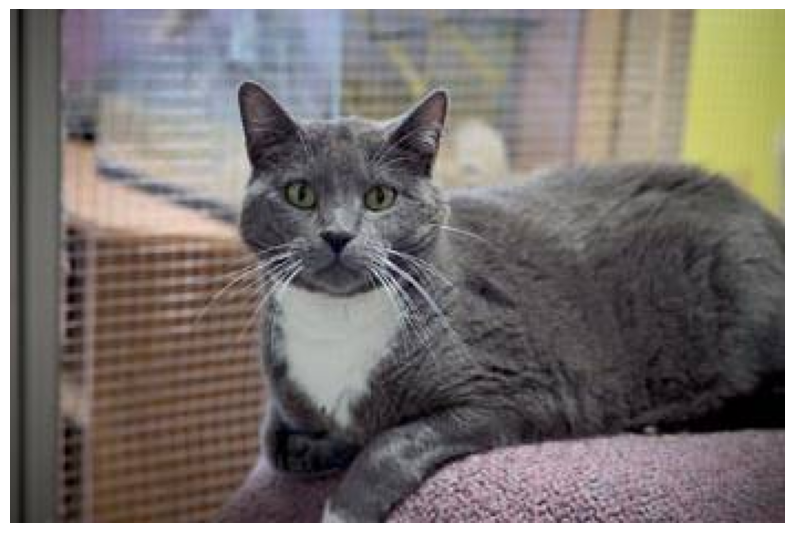

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

rgb channels

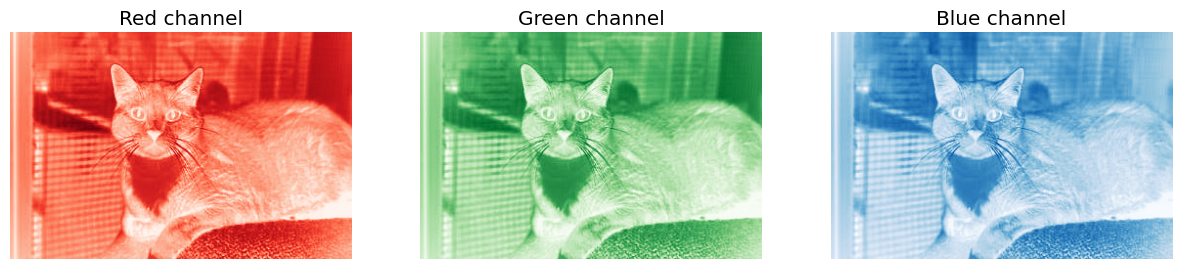

In [28]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

matplotlib vs cv2 NUmpy arrays

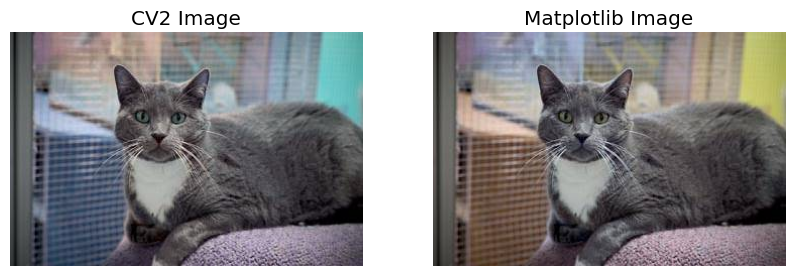

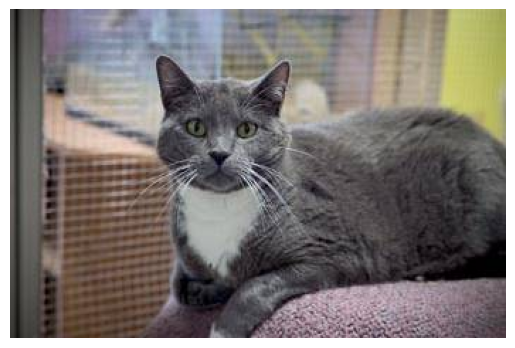

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

image manipulation


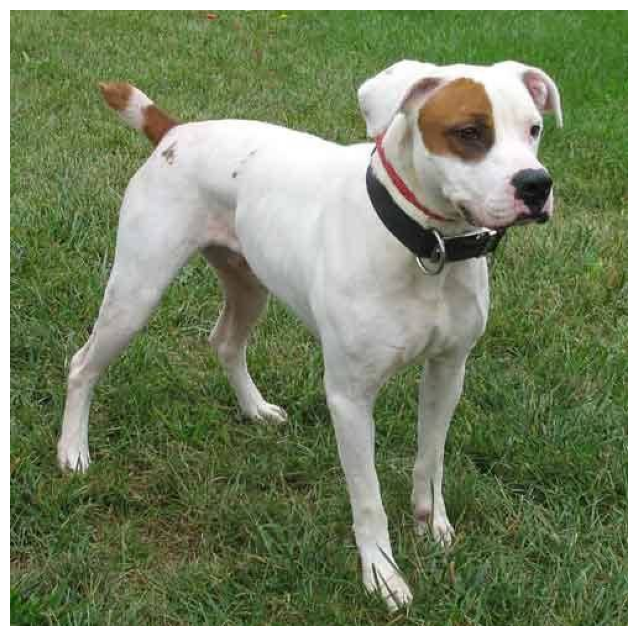

In [31]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

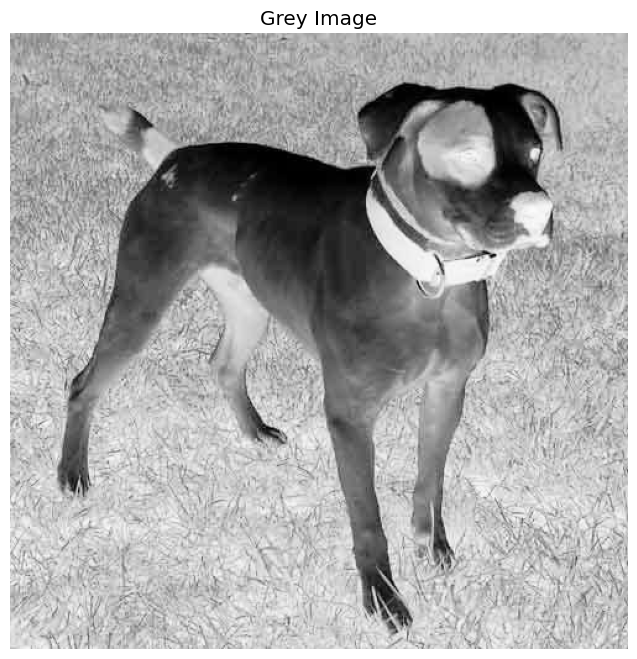

In [32]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

resizing and scaling

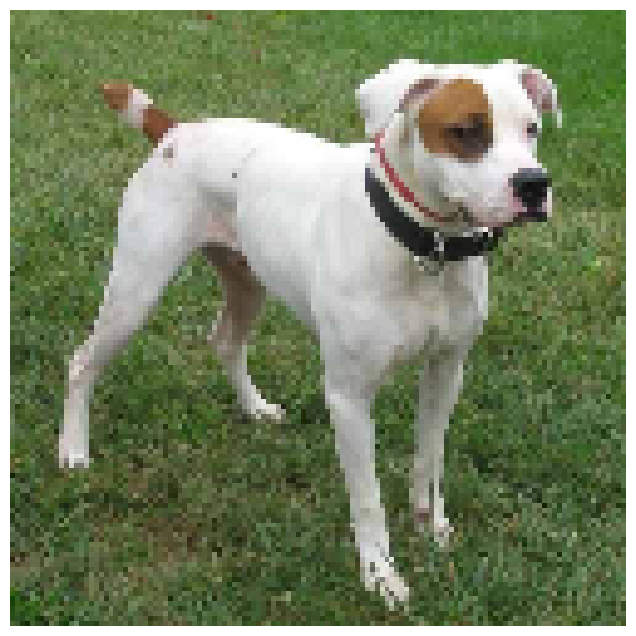

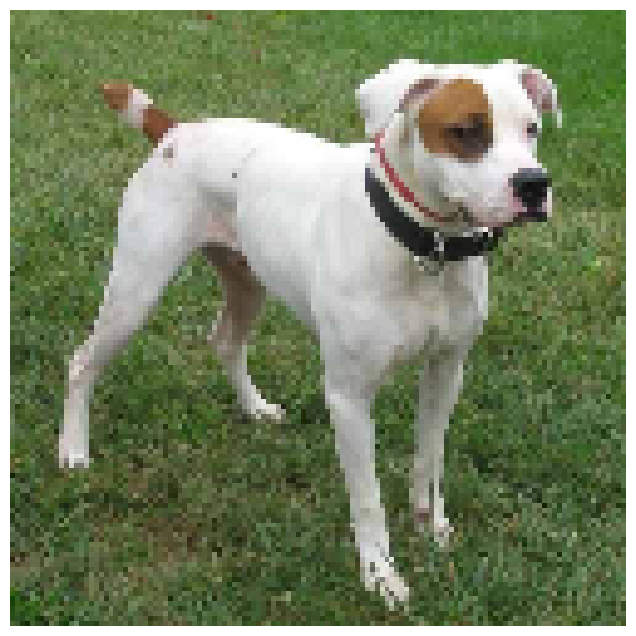

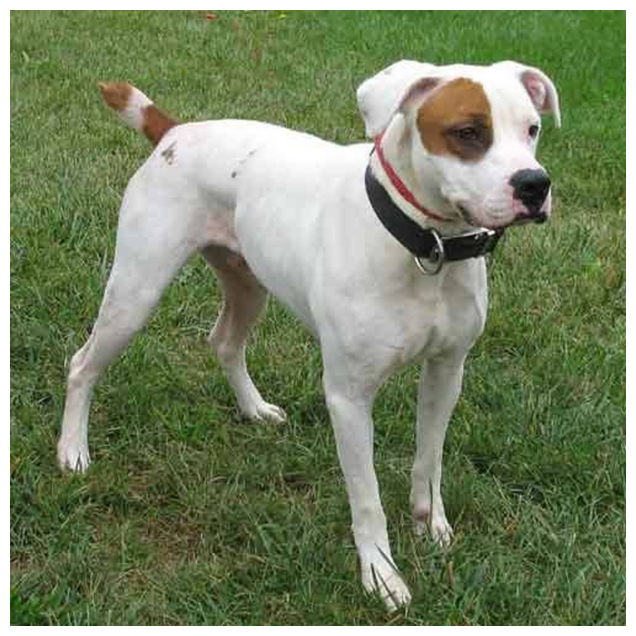

In [35]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()
mg_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

cv2 kernels

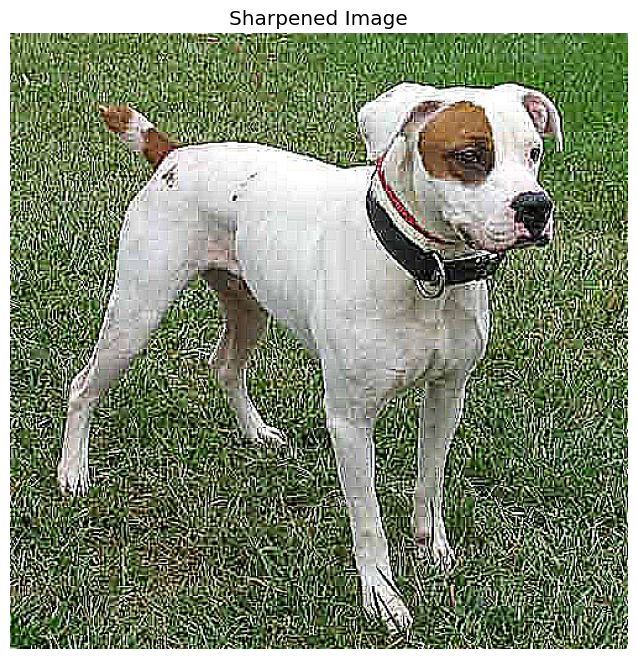

In [36]:
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

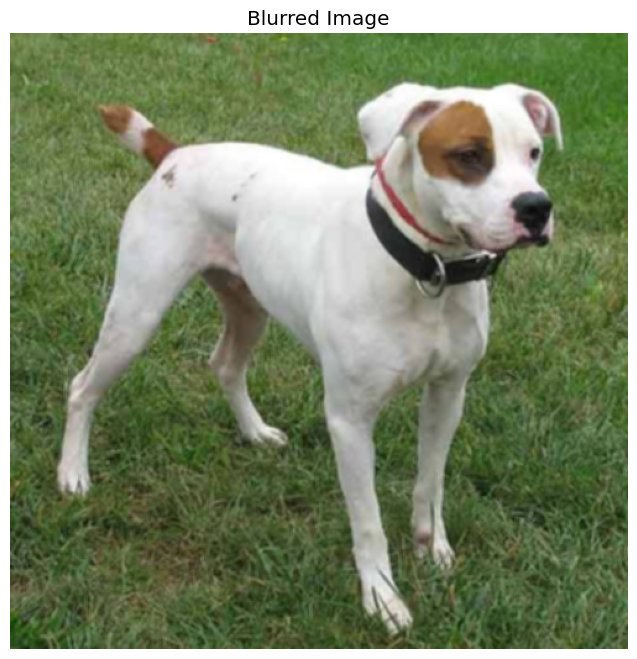

In [37]:
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

saving image

In [38]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True